## Internship Assignment -  Write a report comparing 5 classification algorithims.

## AI.Tech Systems https://ai-techsystems.com/

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv("MM.csv")

In [3]:
data.shape

(830, 6)

In [4]:
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [5]:
data.dtypes

BI-RADS     int64
Age         int64
Shape       int64
Margin      int64
Density     int64
Severity    int64
dtype: object

In [6]:
import matplotlib.pyplot as plt 

In [7]:
x0 =data.Severity.value_counts()[0]
x1 = data.Severity.value_counts()[1]
print(x0 , x1)

427 403


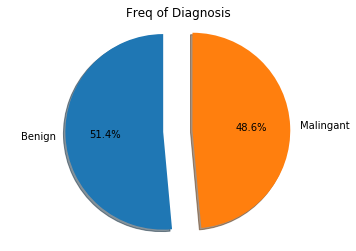

In [8]:
labels = "Benign" , "Malingant"
sizes = [x0 , x1]
explode = [0,0.3]
plt.pie(sizes , explode=explode , labels=labels , shadow=True , startangle=90 , autopct='%1.1f%%')
plt.axis("equal")
plt.title("Freq of Diagnosis")
plt.show()

In [10]:
data1 = data.loc[data["Severity"]== 0]
y_Val1 = data1.Age.values.reshape(-1,1)

In [11]:
data2 = data.loc[data["Severity"]== 1]
y_Val2 = data1.Age.values.reshape(-1,1)

In [13]:
x = data.iloc[:,0:5]
y = data.iloc[:,5]

In [14]:
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN , Y_TEST = train_test_split(x, y, test_size=0.2)

In [15]:
X_TRAIN.shape

(664, 5)

In [16]:
X_TEST.shape

(166, 5)

## PRE PROCESSING OF DATA

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [18]:
x_train = scaler.fit_transform(X_TRAIN)
x_test = scaler.transform(X_TEST)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()

In [22]:
X_train = pca.fit_transform(x_train)

In [23]:
X_test = pca.transform(x_test)

In [24]:
total = sum(pca.explained_variance_)
k = 0
cur_var = 0 
while cur_var / total < 0.999:
    cur_var += pca.explained_variance_[k]
    k = k+1
k

5

In [25]:
pca = PCA(n_components=k)

In [26]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

## SVM

In [33]:
from sklearn.metrics import confusion_matrix

In [27]:
from sklearn import svm

In [28]:
clf1 = svm.SVC(kernel='rbf')

In [29]:
clf1.fit(x_train_pca,Y_TRAIN)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
pred2 = clf1.predict(x_test_pca)

In [31]:
print(clf1.score(x_test_pca,Y_TEST))

0.7951807228915663


In [34]:
confusion_matrix(Y_TEST, pred2)

array([[65, 14],
       [20, 67]], dtype=int64)

## DEC TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf = DecisionTreeClassifier()

In [37]:
clf.fit(x_train_pca,Y_TRAIN)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
pred3 = clf.predict(x_test_pca)

In [39]:
print(clf.score(x_train_pca,Y_TRAIN))
print(clf.score(x_test_pca,Y_TEST))

0.9518072289156626
0.7469879518072289


In [40]:
confusion_matrix(Y_TEST, pred3)

array([[63, 16],
       [26, 61]], dtype=int64)

## RANDOM FORR

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train_pca, Y_TRAIN)
clf.score(x_train_pca,Y_TRAIN),clf.score(x_test_pca,Y_TEST)

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.9412650602409639, 0.7951807228915663)

In [42]:
pred4 = clf.predict(x_test_pca)

In [44]:
confusion_matrix(Y_TEST , pred4)

array([[66, 13],
       [21, 66]], dtype=int64)

## Boosted  Trees

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train_pca, Y_TRAIN)
print(clf.score(x_test_pca, Y_TEST)) 
print(clf.score(x_train_pca , Y_TRAIN))

0.7831325301204819
0.911144578313253


In [81]:
pred_6 = clf.predict(x_test_pca)

In [82]:
confusion_matrix(Y_TEST , pred_6)

array([[65, 14],
       [22, 65]], dtype=int64)

# Artificial Neural Network

In [47]:
X = data.iloc[:, 0:5].values

In [48]:
y = data.iloc[:, 5].values

In [49]:
X

array([[ 5, 67,  3,  5,  3],
       [ 5, 58,  4,  5,  3],
       [ 4, 28,  1,  1,  3],
       ...,
       [ 4, 64,  4,  5,  3],
       [ 5, 66,  4,  5,  3],
       [ 4, 62,  3,  3,  3]], dtype=int64)

In [50]:
y


array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [55]:
X_train = sc.fit_transform(X_train)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [56]:
X_test = sc.transform(X_test)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
import keras

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [58]:
from keras.models import Sequential

In [59]:
from keras.layers import Dense

In [60]:
classifier = Sequential()

In [61]:
classifier.add?

In [71]:
Dense?

In [62]:
classifier.add(Dense(units = 3, kernel_initializer='glorot_uniform', activation='relu', input_dim=5))

In [63]:
classifier.add(Dense(units = 3, kernel_initializer='glorot_uniform', activation='relu'))

In [64]:
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [65]:
classifier.compile?

In [66]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
classifier.fit(X_train, y_train, batch_size=5, nb_epoch=100)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
664/664 [==============================] - 1s 2ms/step - loss: 0.6831 - acc: 0.5873
Epoch 2/100
664/664 [==============================] - 0s 209us/step - loss: 0.6425 - acc: 0.6883
Epoch 3/100
664/664 [==============================] - 0s 207us/step - loss: 0.6059 - acc: 0.7410
Epoch 4/100
664/664 [==============================] - 0s 206us/step - loss: 0.5807 - acc: 0.7651
Epoch 5/100
664/664 [==============================] - 0s 207us/step - loss: 0.5608 - acc: 0.7816
Epoch 6/100
664/664 [==============================] - 0s 209us/step - loss: 0.5455 - acc: 0.7816
Epoch 7/100
664/664 [==============================] - 0s 212us/step - loss: 0.5325 - acc: 0.7877
Epoch 8/100
664/664 [==============================] - 0s 225us/step - loss: 0.5186 - acc: 0.7937
Epoch 9/100
664/664 [==============================] - 0s 207us/step - loss: 0.5045 - acc: 0.7967
Epoch 10/100
664/664 [==============================] - 0s 216us/step - loss: 0.4912 - acc: 0.8117
Epoch 11/100
664/664 

664/664 [==============================] - 0s 218us/step - loss: 0.3646 - acc: 0.8494
Epoch 84/100
664/664 [==============================] - 0s 228us/step - loss: 0.3644 - acc: 0.8494
Epoch 85/100
664/664 [==============================] - 0s 207us/step - loss: 0.3641 - acc: 0.8464
Epoch 86/100
664/664 [==============================] - 0s 206us/step - loss: 0.3642 - acc: 0.8524
Epoch 87/100
664/664 [==============================] - 0s 201us/step - loss: 0.3637 - acc: 0.8509
Epoch 88/100
664/664 [==============================] - 0s 228us/step - loss: 0.3637 - acc: 0.8524
Epoch 89/100
664/664 [==============================] - 0s 218us/step - loss: 0.3639 - acc: 0.8554
Epoch 90/100
664/664 [==============================] - 0s 227us/step - loss: 0.3637 - acc: 0.8539
Epoch 91/100
664/664 [==============================] - 0s 212us/step - loss: 0.3636 - acc: 0.8449
Epoch 92/100
664/664 [==============================] - 0s 201us/step - loss: 0.3639 - acc: 0.8524
Epoch 93/100
664/664 [=

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
y_pred = (y_pred > 0.5)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm = confusion_matrix(y_test, y_pred)

In [72]:
cm

array([[75, 15],
       [13, 63]], dtype=int64)

In [73]:
(63+72) / (63+16+15+72)

0.8132530120481928

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_TEST,pred2))
print(classification_report(Y_TEST,pred3))
print(classification_report(Y_TEST,pred4))
print(classification_report(Y_TEST,pred_6))
print(classification_report(Y_TEST,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        79
           1       0.83      0.77      0.80        87

   micro avg       0.80      0.80      0.80       166
   macro avg       0.80      0.80      0.80       166
weighted avg       0.80      0.80      0.80       166

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        79
           1       0.79      0.70      0.74        87

   micro avg       0.75      0.75      0.75       166
   macro avg       0.75      0.75      0.75       166
weighted avg       0.75      0.75      0.75       166

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        79
           1       0.84      0.76      0.80        87

   micro avg       0.80      0.80      0.80       166
   macro avg       0.80      0.80      0.80       166
weighted avg       0.80      0.80      0.80       166

              preci